In [1]:
plotHeight <- 6
options(repr.plot.width=10, repr.plot.height=plotHeight)

In [3]:
library(tidyverse)

In [32]:
incidents <- read.csv('../data/processed/master-incidents.csv', stringsAsFactors=FALSE) %>% 
    mutate(
        Date = as.Date(BeginDateTime)
    )
head(incidents)

Long,Lat,PublicAddress,CaseNumber,Precinct,ReportedDateTime,BeginDateTime,Offense,Description,UCRCode,GBSID,CenterLong,CenterLat,X,Y,Neighborhood,Date
<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>
-93.30444,44.99577,0016XX MORGAN AVE N,MP2018216327,4,2018-06-30T08:09:00.000Z,2018-06-30T12:10:00.000Z,DASLT2,2ND DEG DOMES ASLT,5,22230,-93.30445,44.99577,-10386603,5620856,Willard - Hay,2018-06-30
-93.24994,44.95007,,MP2018216362,3,2018-06-30T08:00:00.000Z,2018-06-30T03:50:00.000Z,ROBPER,ROBBERY OF PERSON,4,NA,-93.24995,44.95007,-10380536,5613664,East Phillips,2018-06-30
-93.29560,45.02127,0036XX FREMONT AVE N,MP2018216366,4,2018-06-30T12:01:00.000Z,2018-06-30T00:00:00.000Z,BURGD,BURGLARY OF DWELLING,6,10022,-93.29560,45.02127,-10385619,5624870,Folwell,2018-06-30
-93.28721,45.01295,0006XX LOWRY AVE N,MP2018216408,4,2018-06-30T14:03:00.000Z,2018-06-29T36:40:00.000Z,AUTOTH,AUTOMOBILE THEFT,8,25904,-93.28722,45.01296,-10384685,5623561,Hawthorne,2018-06-29
-93.29307,45.01763,0034XX DUPONT AVE N,MP2018216419,4,2018-06-30T11:25:00.000Z,2018-06-30T03:20:00.000Z,BURGD,BURGLARY OF DWELLING,6,10418,-93.29307,45.01763,-10385337,5624298,McKinley,2018-06-30
-93.26036,44.96392,0009XX 19TH ST E,MP2018216438,3,2018-06-30T13:56:00.000Z,2018-06-29T25:30:00.000Z,BURGD,BURGLARY OF DWELLING,6,18708,-93.26037,44.96393,-10381696,5615844,Ventura Village,2018-06-29


In [13]:
weather <- read.csv('../data/processed/cleaned-weather.csv', stringsAsFactors=FALSE) %>% 
    mutate(Date = as.Date(Date))
head(weather)

Date,High,Low,Precipitation,SnowPrecipitation,SnowDepth,IsPrecipitation,IsSnowPrecipitation,IsGroundSnow
<date>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
2010-01-01,6,-9,0,0,9,1,1,1
2010-01-02,1,-15,0,0,9,0,0,1
2010-01-03,7,-14,0,0,9,0,0,1
2010-01-04,7,-10,0,0,9,0,0,1
2010-01-05,10,-9,0,0,9,0,0,1
2010-01-06,16,-4,0,0,9,0,0,1


In [57]:
weather %>% 
    count(IsPrecipitation) %>% 
    rename(Days=n) %>% 
    mutate(Prop=Days/sum(Days))

IsPrecipitation,Days,Prop
<int>,<int>,<dbl>
0,1802,0.5114959
1,1721,0.4885041


In [59]:
weather %>% 
    count(IsSnowPrecipitation) %>% 
    rename(Days=n) %>% 
    mutate(Prop=Days/sum(Days))

IsSnowPrecipitation,Days,Prop
<int>,<int>,<dbl>
0,2853,0.8098212
1,670,0.1901788


In [60]:
weather %>% 
    count(IsGroundSnow) %>% 
    rename(Days=n) %>% 
    mutate(Prop=Days/sum(Days))

IsGroundSnow,Days,Prop
<int>,<int>,<dbl>
0,2506,0.7113256
1,1017,0.2886744


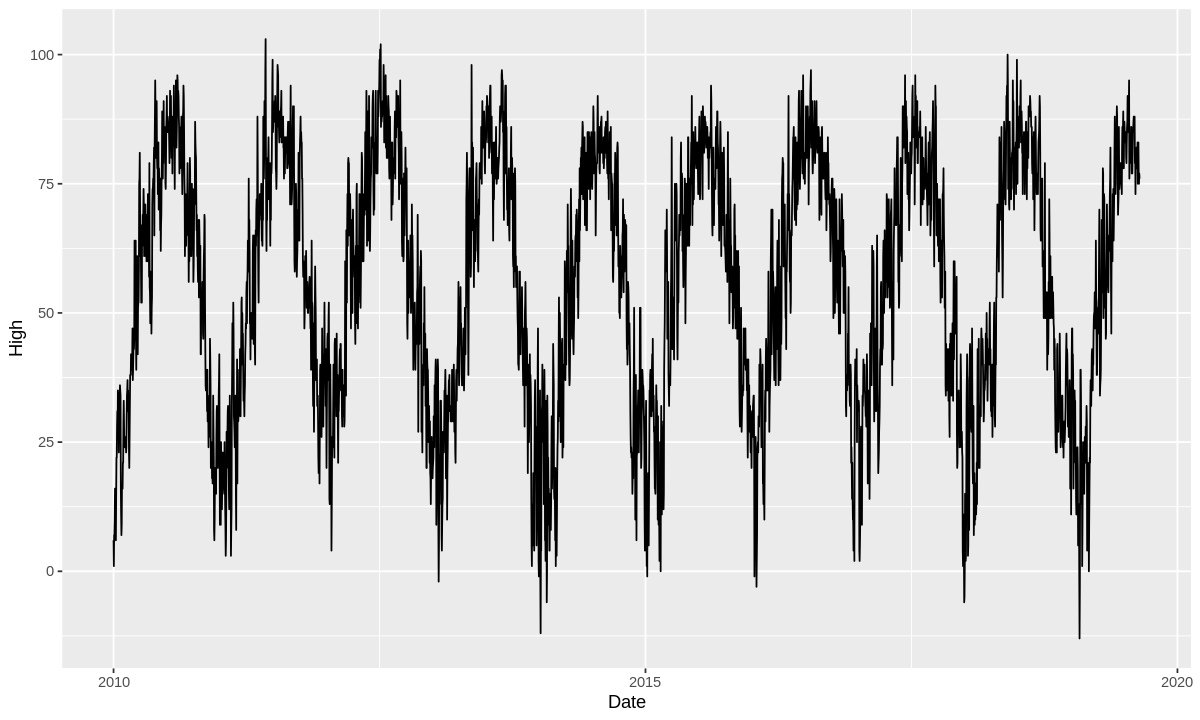

In [15]:
ggplot(weather) +
    geom_line(aes(Date, High))

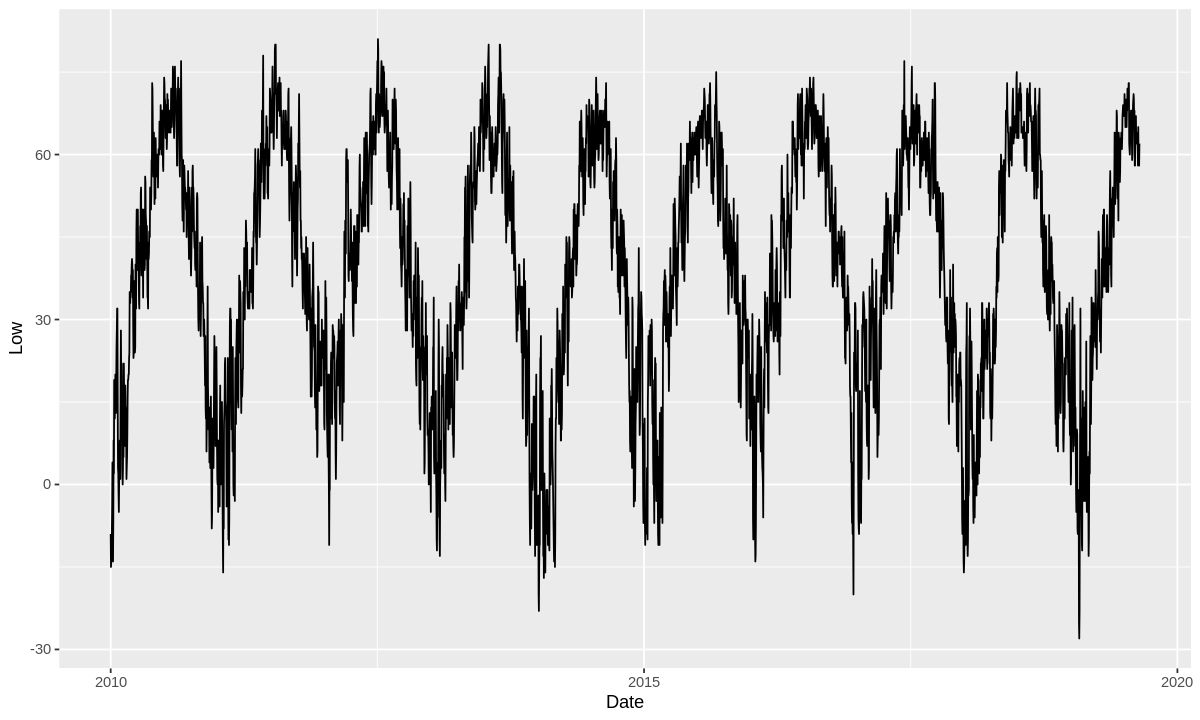

In [16]:
ggplot(weather) +
    geom_line(aes(Date, Low))

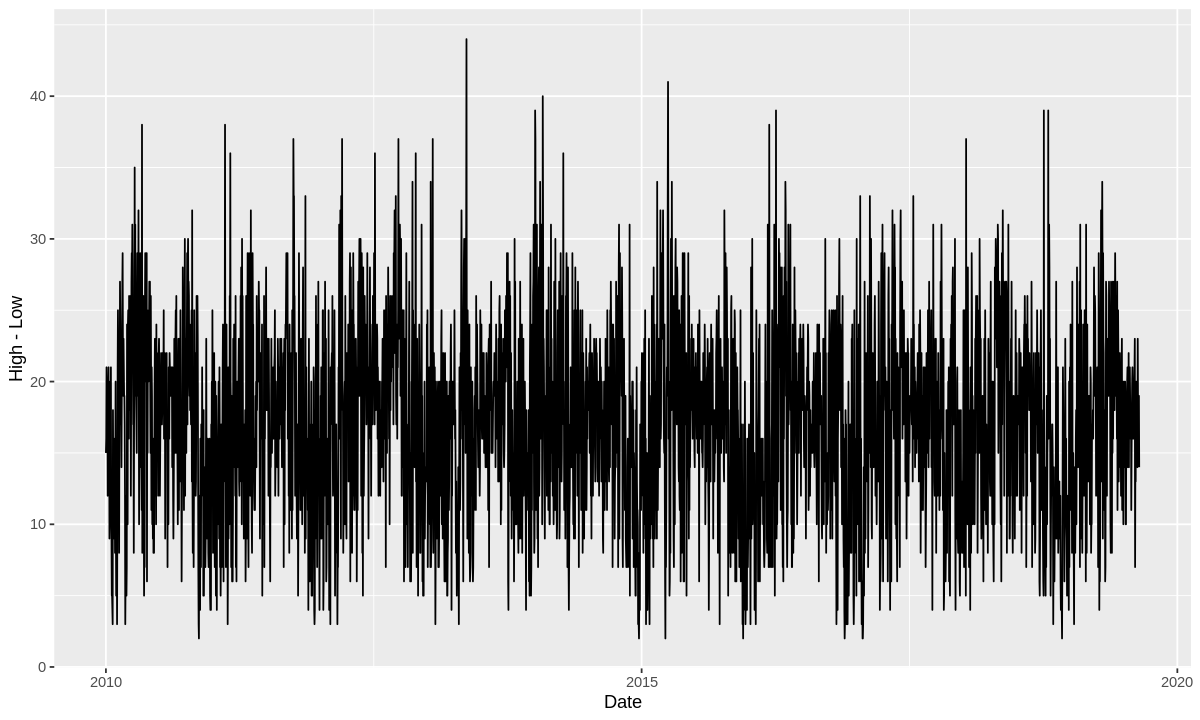

In [21]:
ggplot(weather) +
    geom_line(aes(Date, High - Low))

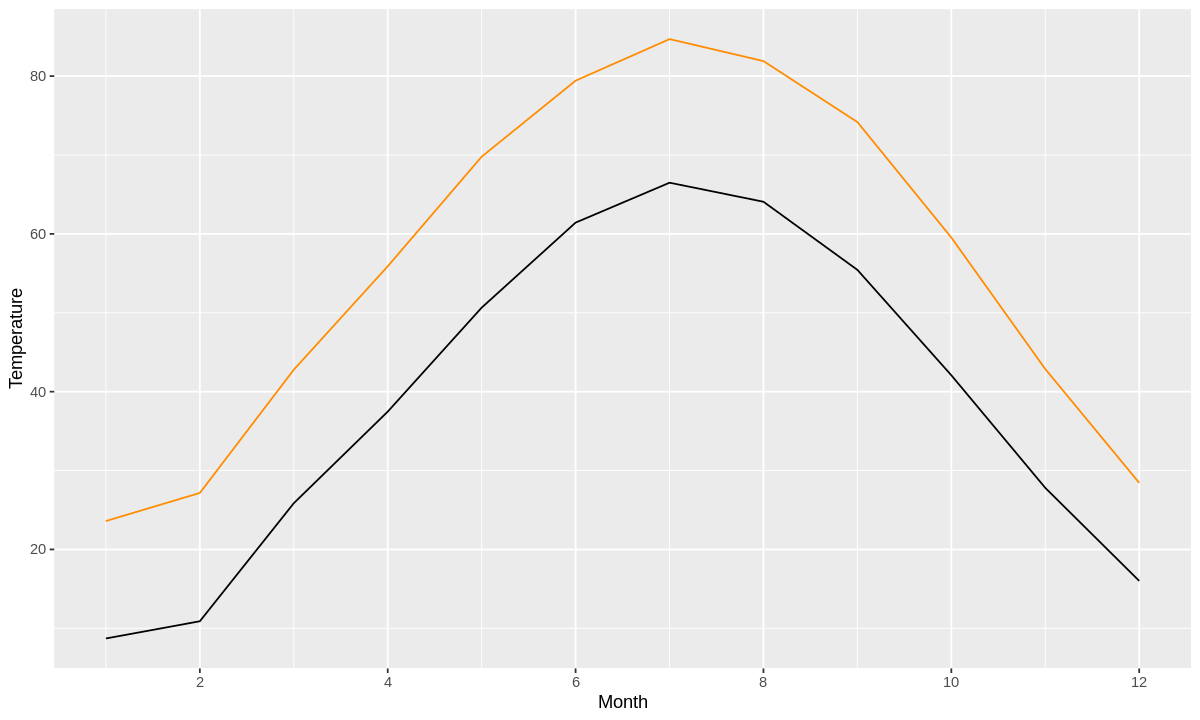

In [28]:
weather %>% 
    mutate(
        Month = as.numeric(str_sub(Date, 6, 7))
    ) %>% 
    group_by(Month) %>% 
    summarise(
        AvgHigh = mean(High),
        AvgLow = mean(Low)
    ) %>% 
ggplot() +
    geom_line(aes(Month, AvgHigh), color='darkorange') +
    geom_line(aes(Month, AvgLow)) +
    scale_x_continuous(limits=c(1, 12), breaks=seq(0, 12, 2)) +
    labs(y='Temperature')

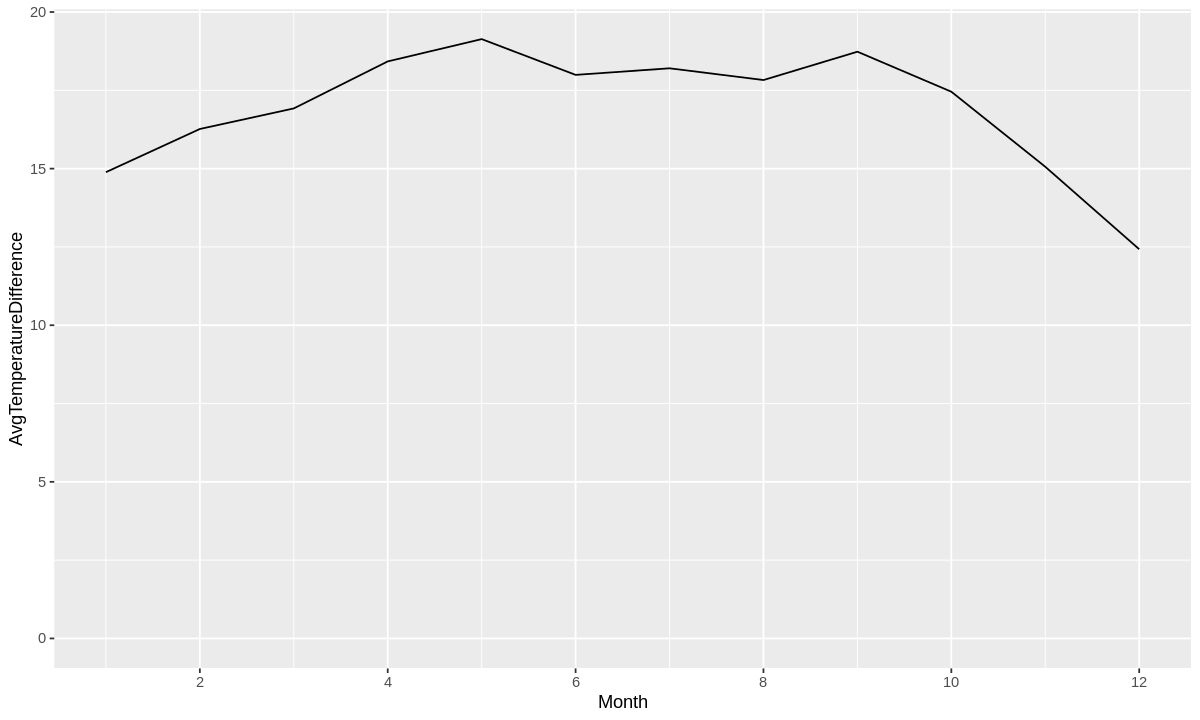

In [31]:
weather %>% 
    mutate(
        Month = as.numeric(str_sub(Date, 6, 7))
    ) %>% 
    group_by(Month) %>% 
    summarise(
        AvgTemperatureDifference = mean(High - Low)
    ) %>% 
ggplot() +
    geom_line(aes(Month, AvgTemperatureDifference)) +
    scale_x_continuous(limits=c(1, 12), breaks=seq(0, 12, 2)) +
    expand_limits(y=0)

In [63]:
incidentsWithWeather <- incidents %>% 
    count(Date) %>% 
    rename(Incidents=n) %>% 
    left_join(weather, 'Date') %>% 
    mutate(
        Month = as.factor(months(Date))
    )
head(incidentsWithWeather)

Date,Incidents,High,Low,Precipitation,SnowPrecipitation,SnowDepth,IsPrecipitation,IsSnowPrecipitation,IsGroundSnow,Month
<date>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<fct>
2010-01-01,62,6,-9,0,0,9,1,1,1,January
2010-01-02,38,1,-15,0,0,9,0,0,1,January
2010-01-03,37,7,-14,0,0,9,0,0,1,January
2010-01-04,62,7,-10,0,0,9,0,0,1,January
2010-01-05,44,10,-9,0,0,9,0,0,1,January
2010-01-06,37,16,-4,0,0,9,0,0,1,January


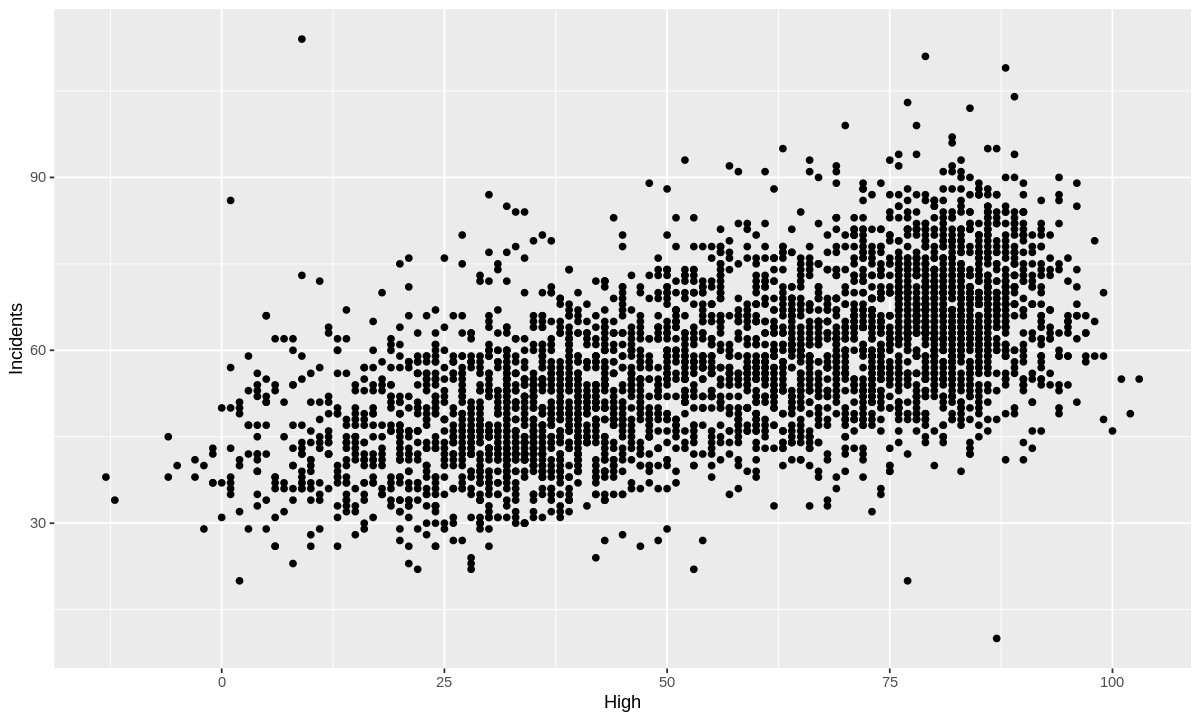

In [40]:
ggplot(incidentsWithWeather) +
    geom_point(aes(High, Incidents))

In [51]:
incidentsVsTemp <- lm(Incidents~High, data=incidentsWithWeather)
summary(incidentsVsTemp)


Call:
lm(formula = Incidents ~ High, data = incidentsWithWeather)

Residuals:
    Min      1Q  Median      3Q     Max 
-57.787  -7.626  -0.495   7.159  72.013 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.010289   0.473909   82.32   <2e-16 ***
High         0.330766   0.007758   42.64   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.12 on 3520 degrees of freedom
Multiple R-squared:  0.3406,	Adjusted R-squared:  0.3404 
F-statistic:  1818 on 1 and 3520 DF,  p-value: < 2.2e-16


In [50]:
incidentsVsPrecip <- aov(Incidents~IsPrecipitation, data=incidentsWithWeather)
summary(incidentsVsPrecip)

                  Df Sum Sq Mean Sq F value   Pr(>F)    
IsPrecipitation    1   2934  2933.5    15.7 7.56e-05 ***
Residuals       3520 657630   186.8                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [62]:
incidentsVsSnowPrecip <- aov(Incidents~IsSnowPrecipitation, data=incidentsWithWeather)
summary(incidentsVsSnowPrecip)

                      Df Sum Sq Mean Sq F value Pr(>F)    
IsSnowPrecipitation    1  79634   79634   482.5 <2e-16 ***
Residuals           3520 580930     165                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [67]:
incidentsVsTempMonth <- lm(Incidents~High+Month, data=incidentsWithWeather)
summary(incidentsVsTempMonth)


Call:
lm(formula = Incidents ~ High + Month, data = incidentsWithWeather)

Residuals:
    Min      1Q  Median      3Q     Max 
-56.877  -7.092  -0.458   6.609  74.275 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     40.8229     1.1058  36.916  < 2e-16 ***
High             0.2139     0.0165  12.959  < 2e-16 ***
MonthAugust      9.2464     0.9623   9.609  < 2e-16 ***
MonthDecember    4.5963     0.9885   4.650 3.45e-06 ***
MonthFebruary   -3.0230     0.9962  -3.035  0.00243 ** 
MonthJanuary     1.4252     1.0079   1.414  0.15743    
MonthJuly       10.1001     0.9787  10.320  < 2e-16 ***
MonthJune        7.4477     0.9459   7.874 4.55e-15 ***
MonthMarch      -1.9181     0.8825  -2.174  0.02980 *  
MonthMay         3.7325     0.8857   4.214 2.57e-05 ***
MonthNovember    7.2649     0.9119   7.967 2.18e-15 ***
MonthOctober     9.5917     0.8807  10.892  < 2e-16 ***
MonthSeptember   9.2108     0.9361   9.840  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.00